In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [32]:
# Load datasets
movies = pd.read_csv('../data/movie.csv')
ratings = pd.read_csv('../data/rating.csv')

In [33]:
movies.sort_values(by='movieId', inplace=True)
movies.reset_index(inplace=True, drop=True)
ratings.sort_values(by='movieId', inplace=True)
ratings.reset_index(inplace=True, drop=True)

In [34]:
# Separate year from title
movies['year'] = movies.title.str.extract("\((\d{4})\)", expand=True)
movies.year = pd.to_datetime(movies.year, format='%Y')
movies.year = movies.year.dt.year
movies.title = movies.title.str[:-7]

In [61]:
print 'Movies : ', movies.shape[0]
print 'Unique Users : ', len(ratings.userId.unique())
print 'Total Ratings : ', ratings.shape[0]

Movies :  27256
Unique Users :  138493
Total Ratings :  20000263


In [36]:
genres_unique = pd.DataFrame(movies.genres.str.split('|').tolist()).stack().unique()

In [39]:
genres_unique = pd.DataFrame(genres_unique, columns=['genre'])

In [40]:
movies = movies.join(movies.genres.str.get_dummies().astype(bool))

In [42]:
ratings.timestamp = pd.to_datetime(ratings.timestamp, infer_datetime_format=True)
ratings.timestamp = ratings.timestamp.dt.year

In [45]:
movies.dropna(inplace=True)
ratings.dropna(inplace=True)

In [46]:
movies.sort_values(by='movieId', inplace=True)
movies.reset_index(inplace=True, drop=True)
ratings.sort_values(by='movieId', inplace=True)
ratings.reset_index(inplace=True, drop=True)

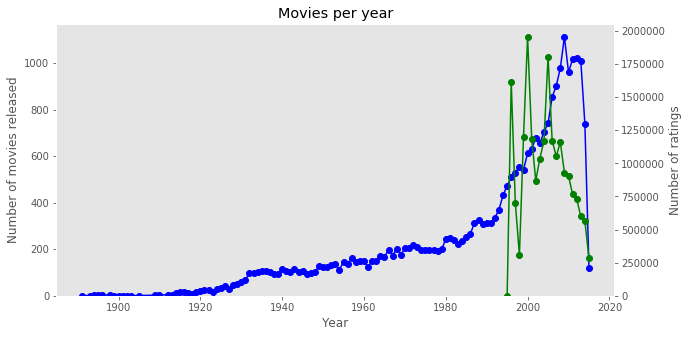

In [69]:
grouped_data = movies[['movieId', 'year']].groupby('year')

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(grouped_data.year.first(), grouped_data.movieId.nunique(), "b-o")
ax1.grid(None)
ax1.set_ylim(0,)

grouped_data = ratings[['rating', 'timestamp']].groupby('timestamp')
ax2 = ax1.twinx()
ax2.plot(grouped_data.timestamp.first(), grouped_data.rating.count(), "g-o")
ax2.grid(None)
ax2.set_ylim(0,)

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of movies released'); ax2.set_ylabel('Number of ratings')
plt.title('Movies per year')
plt.savefig('movies_per_year.jpg', quality=95, dpi=240)
plt.show()

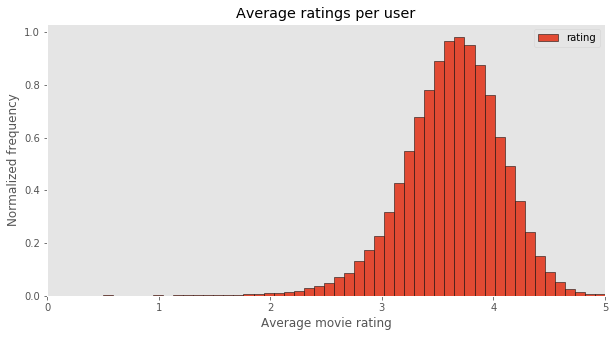

In [68]:
grouped_data = ratings[['userId','rating']].groupby('userId').mean()
grouped_data.plot(kind='hist', bins=50, grid=0, normed=True, edgecolor='black', figsize=(10,5))
plt.xlim(0,5)
plt.legend()
plt.xlabel('Average movie rating')
plt.ylabel('Normalized frequency')
plt.title('Average ratings per user')
plt.savefig('average_ratings.jpg', quality=95, dpi=240)
plt.show()

In [62]:
movies[movies['movieId']==720]

,movieId,title,genres,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
708,720,Wallace & Gromit: The Best of Aardman Animation,Adventure|Animation|Comedy,1996.0,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
